# Анализ поведения пользователей в мобильном приложении.

Ссылка на презентацию: https://drive.google.com/file/d/1Ir35mqfq0r5hLNd4dqh_fc7Dw7bXJ164/view?usp=sharing

## Цель исследования

Исследование анализируются события совершаемых пользователями мобильногоприложения "Ненужные вещи" и в конечном итоге их влиянием на на целевое действие - просмотр контактов.  
Исследжование будет использовано менеджерами компании по улучшению взаимодействия с продудктом. 
В исследовании будет произведен исследовательский анализ данный из логов прилложения, что позволит выявить закономерности и влхможно новые инсайты клиентского п оведения и пути.  
Будут рассмотерны две группы пользователей - совершившие ключевое действие и нет. Будт рассчиатны метрики и построены распределения действий клиентов. Также будут  проверены 2 наиболее актуальные для бизнеса гипотезы.  
Конечной целью исследования станут рекомендации по улучшению клиентского взаимодействия с приложением и, если таковые будут выялены, по борьбе с текущими слабыми местами процесса.

## Оглавление

#### [Шаг 1. Загрузим и изучим общую информацию о данных.](#step1)  
#### [Шаг 2. Предобработаем данные.](#step2)    
Шаг 2.1. Определим и изучим пропуски.  
Шаг 2.2. Приведем данные к нужным типам.  
Шаг 2.3. Добавим к данным стобец дня и недели.  
Шаг 2.4. Доавим дату первого действия пользователя в таблицу.  
Шаг 2.5. Объединим таблицы действий и источника пользователя.
#### [Шаг 3. Проведем исследователский анализ данных.](#step3)    
#### [Анлизировать неагрегированные данные сложно и не показательно. Нужно привести данные к одному пользователю.](#step3.1)      
Шаг 3.1. Построим пивот по количеству действий в зависимости от типа действия по пользоваетелям.  
Шаг 3.7. Добавим пивот с бинарными значениями событий. Приведем имеющийся пивот с количеством действий к 0 и 1 значениям.  
Шаг 3.2. Разделим пользователей на тех кто совершил целевое событие и тех кто не совершал. Добавим индикатор.  
Шаг 3.11. Построим воронку: Пользователь приложения - просмотр контаков - звонок (по уникальным пользователям).
#### [Посмотрим как в целом распределены совершаемые действия.](#step3.2)    
Шаг 3.3. Изучим совершаемые пользователелями действия. Построим их распределения.  
Шаг 3.4. Определим и избавимся от редких и выбивающихся значений.  
Шаг 3.5. Объединим схожие индикаторы в один.  
#### [Проанализируем связь целевого события — просмотра контактов — и других действий пользователей.](#step3.3)    
Шаг 3.8. Построим матрицу корреляций действий. По пивоту с общим количеством действий и по бинарному. Выделим закономерности. 
#### [Оценим какие действия совершают те пользователи, которые просматривают контакты.](#step3.4)    
Шаг 3.6. Отсортируем действия пользователей по популярности. Найдем самые популярные события. По группам пользователей (совершал/не совершал).    
Шаг 3.9. Рассчитаем метрики DAU, WAU. Для всей базы, затем по группам, по источникам.  
Шаг 3.10. Рассчитаем недельный Retention rate. По всей базе, в разбивке по группам пользователей, по источникам.  
  
Шаг 3.12. Вывод. Основные инсайты.  
#### [Шаг 4. Проверим статистические гипотезы.](#step4)
Шаг 4.1. Определимся с гипотезами. Добавим свою гипотезу. Свормулируем 0 и альтернативными гипотезами.  
Шаг 4.2. Проверим размеры выборок. Сравним их размеры.    
Шаг 4.3. Подберем подходящий статисчический тест.  
Шаг 4.4. Подберем подходящий статистический урочень значимости.  
Шаг 4.5. Проверим гипотезы и сформулируем выводы.  
#### [Шаг 5. Выводы и рекомендации.](#step5)    
Шаг 5.1. Сформулируем выводы по исследованию. Опишем инсайты и проблемы.  
Шаг 5.2. Опишем, как можно использовать полученные инсайты и как можно улучшить взаимодействие клиента с приложением.

In [289]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Загрузим и изучим общую информацию о данных. <a id="step1"></a>

In [290]:
df = pd.read_csv('mobile_dataset.csv') ## загружаю данные локально 
df_sources = pd.read_csv('mobile_soures.csv') ## в названии файла ошибка 

In [291]:
display(df.head())
df.info()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [292]:
df.columns = ['event_time', 'event_name', 'user_id'] # чтобы не бесили)

In [293]:
display(df_sources.head())
df_sources.info()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [294]:
df_sources.columns = ['user_id', 'source']

## Предобработаем данные. <a id="step2"></a>

Проверим нет ли дубликатов.

In [295]:
df.duplicated().sum()

0

In [296]:
df_sources.duplicated().sum()

0

Дубликатов нет.

Объединим таблицы. Проверим количество уникальных пользователей.

In [297]:
df['user_id'].nunique()

4293

Количество пользователей в таблицах совпадает, объединям.

In [298]:
df = df.merge(df_sources, on = 'user_id', how = 'left')

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [300]:
df['event_time'] = df['event_time'].astype('datetime64')

In [301]:
df['day'] = df['event_time'].dt.date
df['week']= df['event_time'].dt.week
df['hour'] = df['event_time'].dt.hour

In [302]:
df['event_name'] = df['event_name'].replace('show_contacts', 'contacts_show')

In [303]:
first_action_by_user = df.groupby('user_id')['event_time', 'event_name'].min().reset_index()
first_action_by_user.columns = ['user_id', 'first_event_time', 'first_event_name']

In [304]:
df = df.merge(first_action_by_user, on = 'user_id', how ='left')

In [305]:
df.drop_duplicates(subset='user_id')['first_event_name'].value_counts()

advert_open      751
map              721
tips_show        707
contacts_show    651
photos_show      624
contacts_call    192
favorites_add    153
search_5         107
search_4         105
tips_click        97
search_2          96
search_1          80
search_3           7
search_7           2
Name: first_event_name, dtype: int64

Интересным инсайтом может стать тот факт, что 15% пользователей первым действием просмотрели контакты.

In [306]:
df['first_day'] = df['first_event_time'].dt.date
df['first_week']= df['first_event_time'].dt.week
df['first_hour'] = df['first_event_time'].dt.hour

## Проведем исследователский анализ данных. <a id="step3"></a>

#### Анлизировать неагрегированные данные сложно и не показательно. Нужно привести данные к одному пользователю.<a id="step3.1"></a>

In [307]:
actions_by_users = df.pivot_table(index = 'user_id', columns = 'event_name', values = 'event_time', aggfunc = 'count').fillna(0).reset_index()

In [308]:
actions_by_users.head()

event_name,user_id,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,2.0,5.0,11.0,2.0,0.0,33.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00463033-5717-4bf1-91b4-09183923b9df,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,6.0,0.0,4.0
4,00551e79-152e-4441-9cf7-565d7eb04090,0.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверим, сможем ли мы объединить разные типы поиска в один формат. Проверим распрделения.

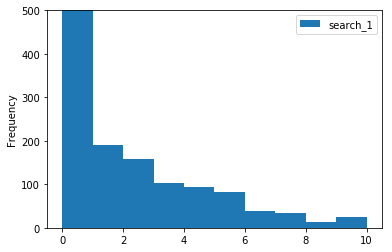

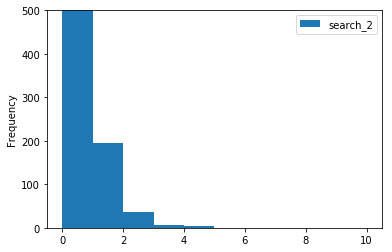

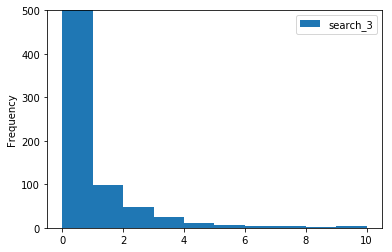

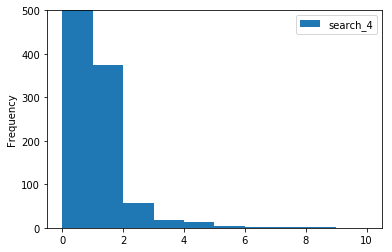

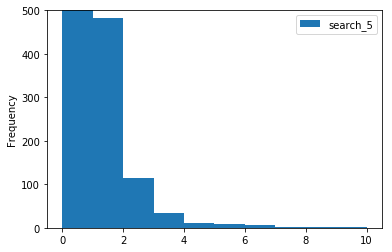

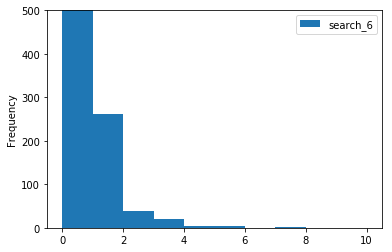

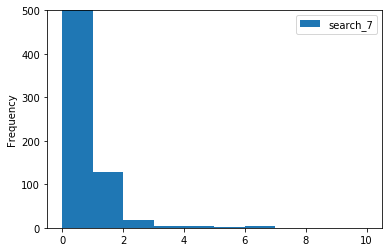

In [309]:
for i in range(1,8):
    actions_by_users.plot(y ='search_{}'.format(i),kind = 'hist', range = (0,10), bins = 10, ylim = (0,500))
    plt.show()

Распредления для разных типов поиска примерно одинаковые, можно объединить их в 1 перемунную.

In [310]:
actions_by_users['search'] = 0
for i in range(1,8):
    a = 'search_{}'.format(i)
    actions_by_users['search'] += actions_by_users[a]
actions_with_search = actions_by_users
actions_by_users = actions_by_users.drop(['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7'], axis = 1)

In [311]:
def binary(a):
    for i in range(1,len(a)):
        if a[i]>0:
            a[i] = 1
        else:
            a[i] = 0
    return a

In [312]:
actions_by_users_binary = actions_by_users.apply(binary, axis = 1)

In [313]:
actions_by_users_binary.head()

event_name,user_id,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,tips_click,tips_show,search
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0,0,0,0,1,0,0,1,0
1,00157779-810c-4498-9e05-a1e9e3cedf93,1,1,1,1,0,1,0,0,1
2,00463033-5717-4bf1-91b4-09183923b9df,0,0,0,0,0,1,0,0,0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,1,0,0,0,1,0,0,1,1
4,00551e79-152e-4441-9cf7-565d7eb04090,0,1,1,0,0,1,0,0,1


Создадим список пользователей, которые хотя бы раз совершили целевое дествие.

In [314]:
goal_users = actions_by_users_binary[actions_by_users_binary['contacts_show']==1]['user_id']

In [315]:
goal_users.count()

981

Построим воронку, в которой будет видна конверсия из пользователя приложения в просмотр контактов и в конечном итоге в звонок. Сделаем это по числу уникальных пользователей совершаваший оперделенные действия. Поскольку последовательность действий можно выстроить не по всем этапам будем использовать только 2 действия, просмотр контактов и звонок, а общее количтество пользователей возьмем из всео датасета.

In [316]:
funnel = actions_by_users_binary
funnel['is_a_user']= 1
funnel = funnel[['is_a_user','contacts_show', 'contacts_call']].sum().reset_index()
funnel.columns = ['event_name', 'unique_users']
funnel

,event_name,unique_users
0,is_a_user,4293
1,contacts_show,981
2,contacts_call,213


In [317]:
fig = go.Figure(go.Funnel(
    y = funnel['event_name'],
    x = funnel['unique_users']))
fig.update_layout(title="Воронки событий")
fig.show()

Таким образом, после построения воронки мы замечаем, что лишь 22.9% пользоватей приложения просматривают контакты, а из тех, кто просматривает контакты, лишь 21,7% звонит по номеру телефона, таким образом, процент конечных звонков смоставляет лишь 5% от общего чилса пользователей приложения.

#### Посмотрим как распределены действия пользователей. <a id="step3.2"></a>

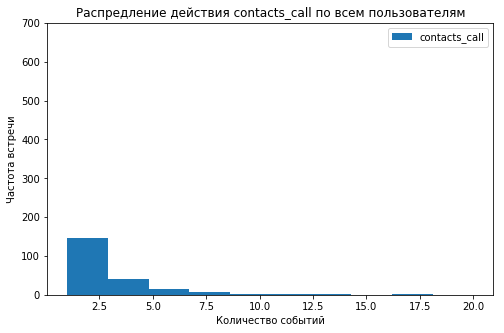

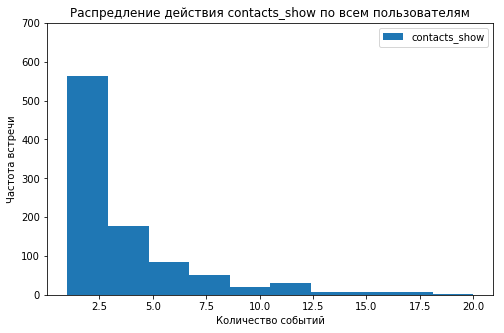

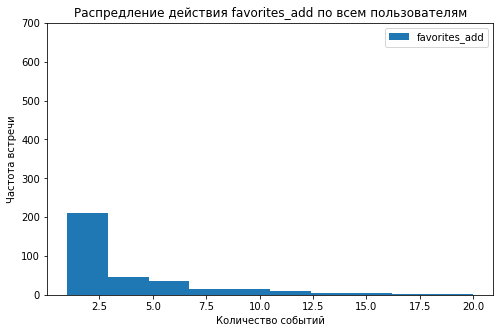

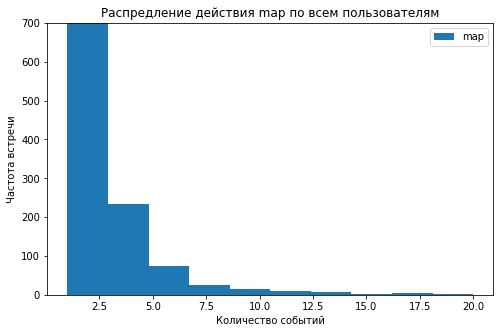

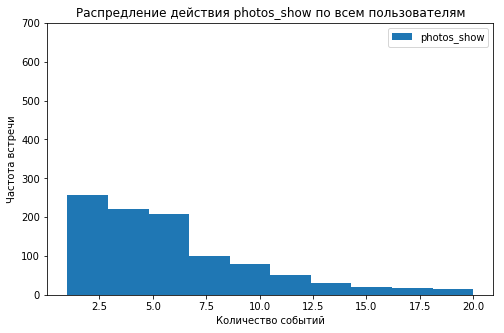

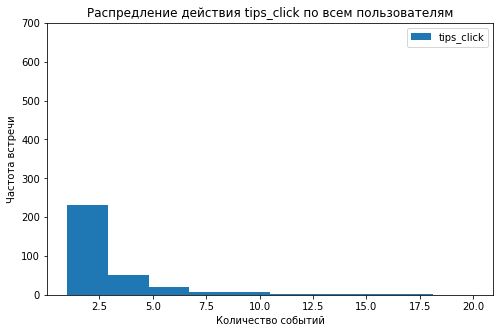

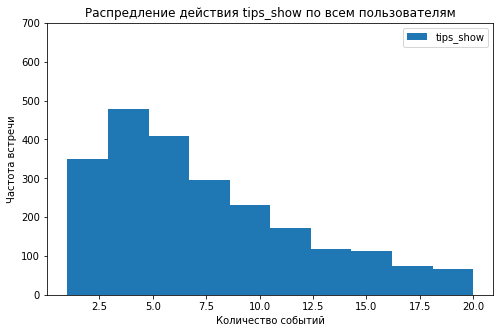

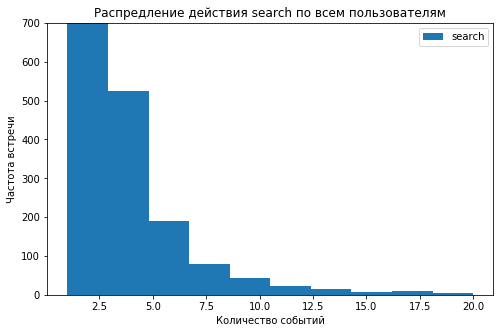

In [318]:
for i in actions_by_users.columns[2:]:
    actions_by_users\
        .plot(y = i,
              kind = 'hist',
              range = (1,20),
              bins = 10,
              figsize = (8,5),
              title = "Распредление действия {} по всем пользователям".format(i),
              ylim = (0,700)
              )
    plt.xlabel('Количество событий')
    plt.ylabel('Частота встречи')

После рассмотрения распредлений действий всей пользовательской базы мы замечаем, что большинство распредлений похожи на пуассовноские, и что нормально, ведь менее активных пользователей больше чем более активных.  
Интересно взяглнуть на распредление целевого действия contacts_show, так ниобольшее количество пользоваетелй просматривает контакты всего 1 раз - чуть менее 10% всей базы пользователей. Затем распределение планво идет на спад. Если затем взглянуть на звонки клиентам, то распределение похоже, но значительно меньше по количетву пользователей, что закономерно.  
Интерсно также взглянуть на действия, которые приносят бизнесу деньги а именно, tips_show и tips_click. Расределение tips значительно более растянуто и ан промеждутке от 1 до 10 напоимнает нормальное распрделение, это вероятно вызвано с тем, что показы рекламы не зависят от пользователей и задаются извне алгоритмами. Что касатеся конверсии из показа tips в нажатие на них, то распределение снова похоже на пуассона, ведь оно отражате действия уже клиентов - больше всго клиентов открывают рекламу всего 1 раз.  
Просмотр фотокгарфий также отличается от других метрик тем, что распредление данного покзаателя также более "растянуто", из чего можно сделать предположение, что пользователи дольше совершают данное действие в своем лайфтайме.

 Построим совершаемые события в разбивке по пользователям, которые открывали контакты, и которые этого не делали.

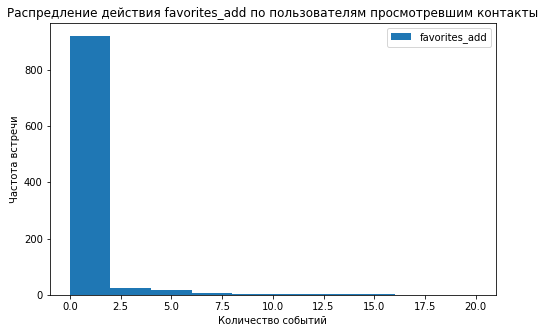

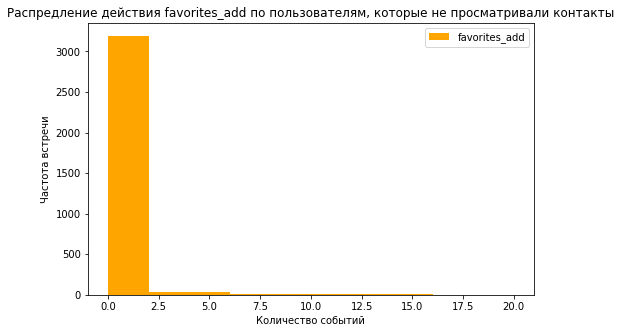

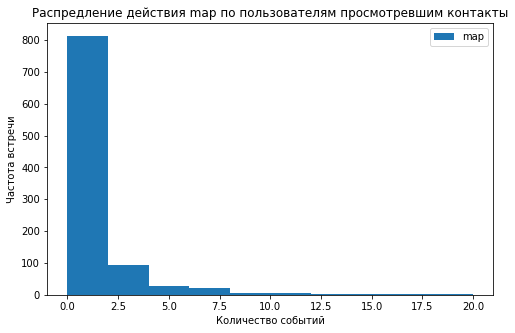

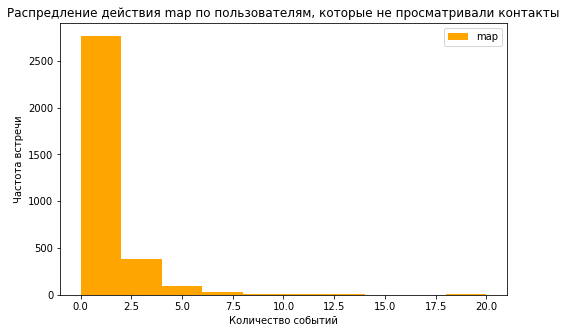

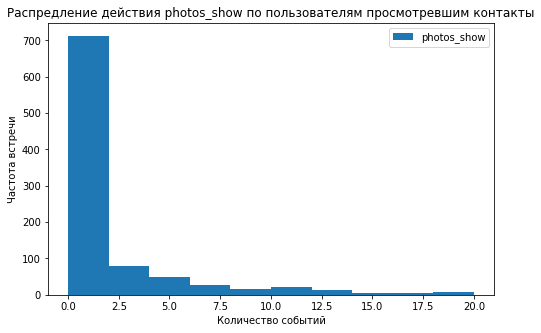

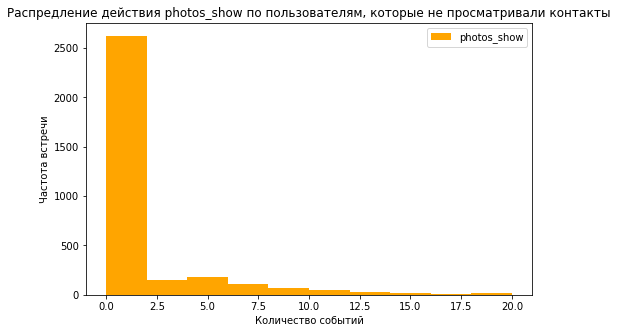

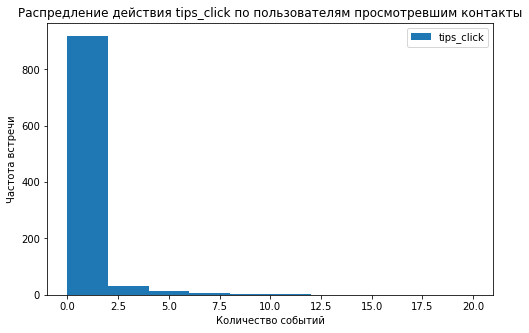

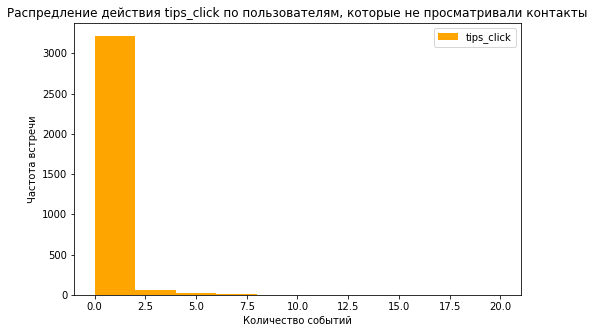

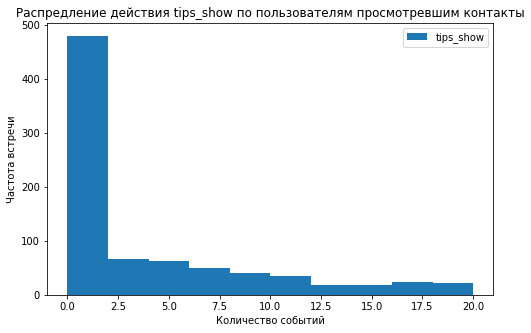

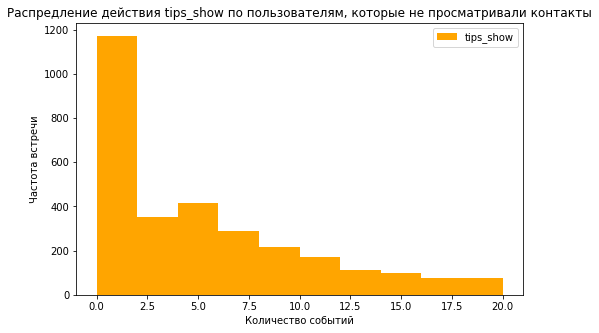

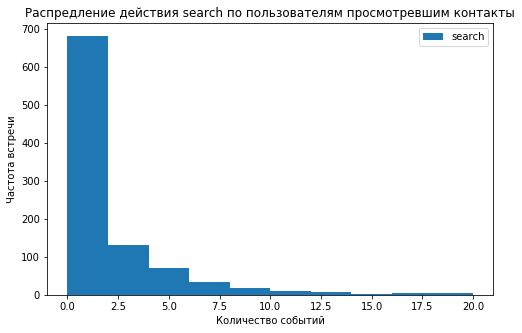

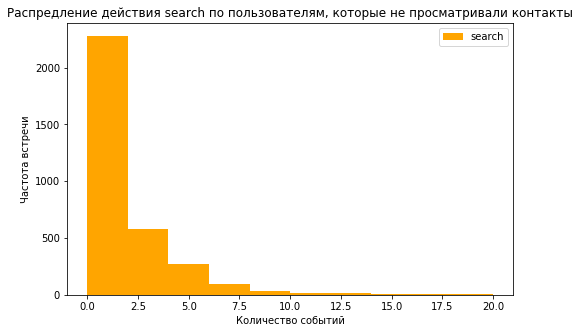

In [319]:
for i in actions_by_users.columns[4:]:
    actions_by_users[actions_by_users['user_id'].isin(goal_users)==True]\
        .plot(y = i,
              kind = 'hist',
              range = (0,20),
              bins = 10,
              figsize = (8,5),
              title = "Распредление действия {} по пользователям просмотревшим контакты".format(i),
              )
    plt.xlabel('Количество событий')
    plt.ylabel('Частота встречи')
    
    actions_by_users[actions_by_users['user_id'].isin(goal_users)==False]\
        .plot(y = i,
              kind = 'hist',
              range = (0,20),
              bins = 10,
              color = 'orange',
              figsize = (8,5),
              title = "Распредление действия {} по пользователям, которые не просматривали контакты".format(i))
    plt.xlabel('Количество событий')
    plt.ylabel('Частота встречи')

Распредлеение событий выглядят примерно одинаковыми, но у клиентов которые не просматривали контакы меньше в процентном отношении. Особого внимания заслуживает распредление показов рекламы, рассмотрим из поближе.

Text(0, 0.5, 'Частота встречи')

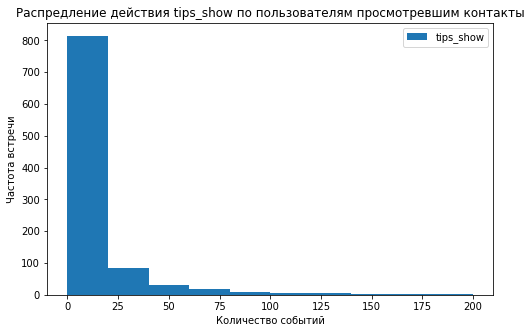

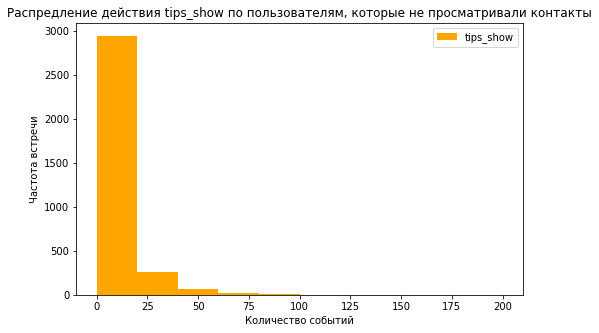

In [320]:
actions_by_users[actions_by_users['user_id'].isin(goal_users)==True]\
        .plot(y = 'tips_show',
              kind = 'hist',
              range = (0,200),
              bins = 10,
              figsize = (8,5),
              title = "Распредление действия {} по пользователям просмотревшим контакты".format('tips_show'),
              )
plt.xlabel('Количество событий')
plt.ylabel('Частота встречи')
    
actions_by_users[actions_by_users['user_id'].isin(goal_users)==False]\
        .plot(y = 'tips_show',
              kind = 'hist',
              range = (0,200),
              bins = 10,
              color = 'orange',
              figsize = (8,5),
              title = "Распредление действия {} по пользователям, которые не просматривали контакты".format('tips_show'))
plt.xlabel('Количество событий')
plt.ylabel('Частота встречи')

Таким образом, пользователи, которые просматривали контакты, получают от нас больше рекламы, и вероятно это вызвано тем, что они дольше живут в приложении. Для нашей компании, которая на текущий момент монетизируется тольок за показ и клкиипо рекомендациям - это ключевой показатель. Поэтому нам выгодно чтобы пользователи дольше жэили в приложении и мы покзаывали им рекламу, однако, чтобы пользователи жили дольше в приложении оно должно быть им полезно. 

In [321]:
def goal_user(a):
    if a in list(goal_users):
        return 'goal_user'
    else:
        return 'not_goal_user'

In [322]:
actions_by_users_hue = actions_by_users
actions_by_users_hue['type'] = actions_by_users_hue['user_id'].apply(goal_user)

<Figure size 720x720 with 0 Axes>

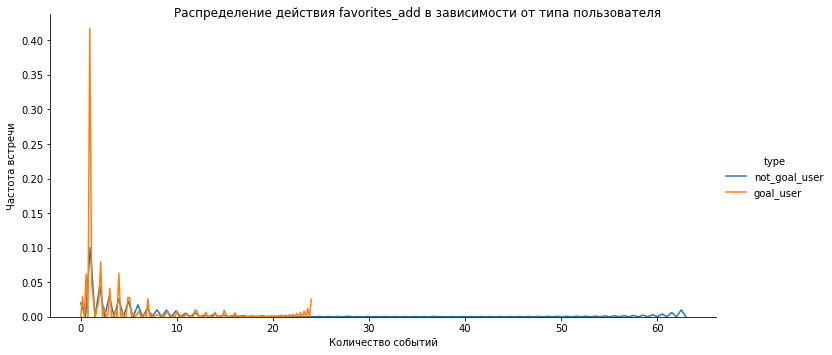

<Figure size 720x720 with 0 Axes>

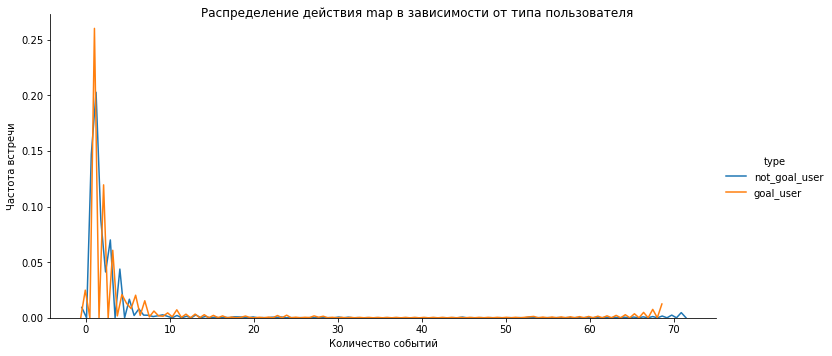

<Figure size 720x720 with 0 Axes>

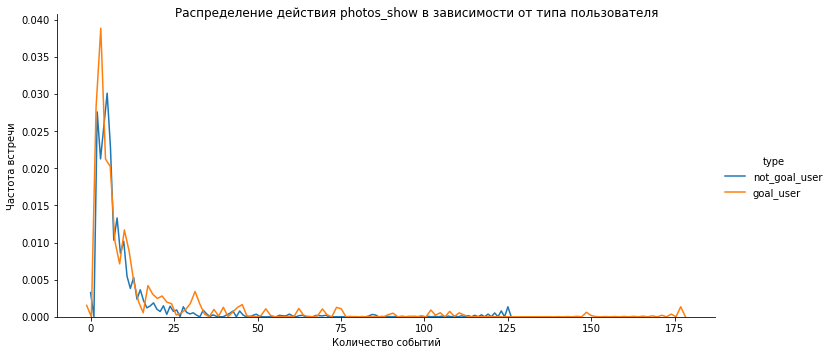

<Figure size 720x720 with 0 Axes>

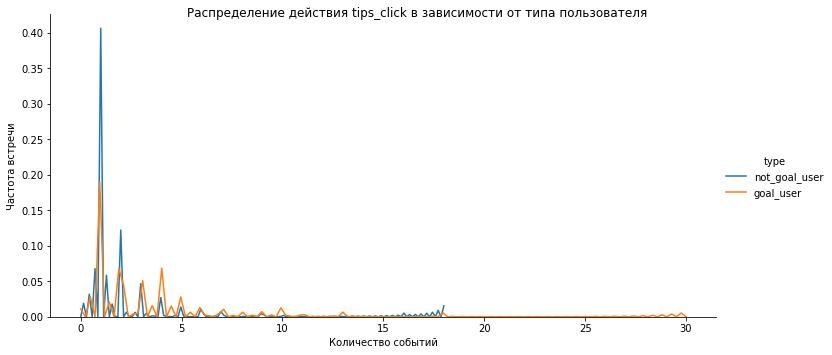

<Figure size 720x720 with 0 Axes>

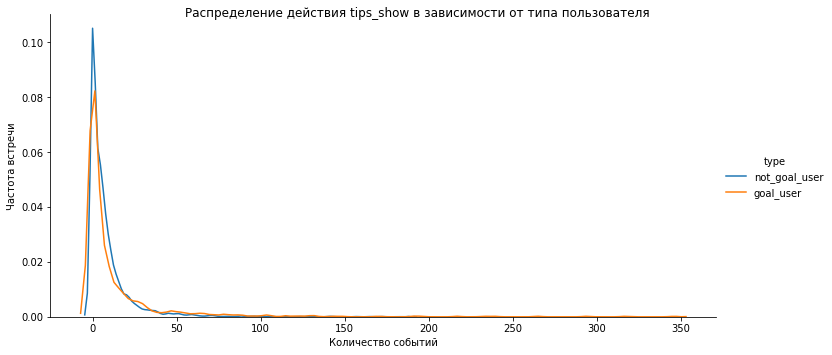

<Figure size 720x720 with 0 Axes>

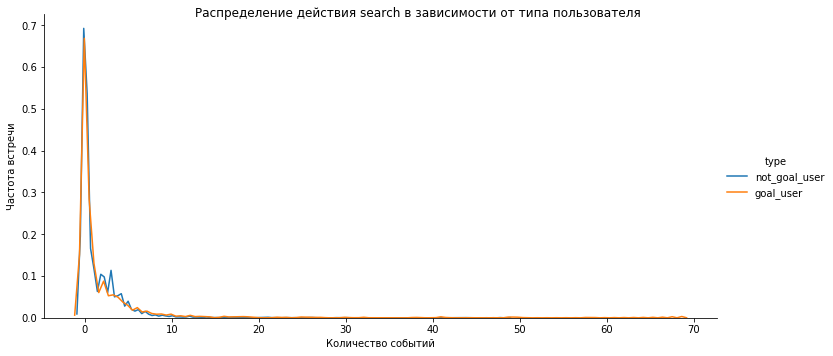

In [323]:
for i in actions_by_users_hue.columns[4:10]:    
    plt.figure(figsize = (10,10))
    _, bins = np.histogram(actions_by_users_hue[i])
    g = sns.FacetGrid(actions_by_users_hue, hue="type", height=5, aspect=2)
    g = g.map(sns.distplot, i, bins=bins, hist=False)
    g.add_legend(title='type') 
    g.fig.suptitle('Распределение действия {} в зависимости от типа пользователя'.format(i))
    g.axes[0,0].set_ylabel('Частота встречи')
    g.axes[0,0].set_xlabel('Количество событий')


Таким образом, пришел к выводу, что распредедления большинства действий реально похожи. Ключевые пользоавтели же показывают более длинные распределения (больше срок пользования) и реже 0 раз совершают действие (больше вовлечены). Также выявил другую аномалию: добавления в избранное у КП обрываюбтся раньше чем не у ключевых. Возможно тут тоже есть какая-то техническая проблема - либо пользователи которые просматривают контакты быстрее находят что им надо.


### Проанализируем связь целевого события — просмотра контактов — и других действий пользователей. <a id="step3.3"></a> 

Построим матрицу корреляций событий и выберем только столбец с просмотром контаков. Сначала сделаем жто по пивоту с абсолютным количеством пользователей.

In [324]:
contacts_show_corr = actions_by_users.corr()['contacts_show'].reset_index().sort_values(by = 'contacts_show', ascending = False)
contacts_show_corr.columns = ['Название события', 'Корреляция события с просмотром контактов']
contacts_show_corr

,Название события,Корреляция события с просмотром контактов
2,contacts_show,1.000000
7,tips_show,0.424281
4,map,0.317998
6,tips_click,0.214662
1,contacts_call,0.205595
8,search,0.065450
0,advert_open,0.052408
5,photos_show,0.025482
3,favorites_add,0.015627


Аналогично построим матрицу корреляций по бинарному пивоту.

In [325]:
actions_by_users_binary.corr()['contacts_show'].reset_index().sort_values(by = 'contacts_show', ascending = False)

,event_name,contacts_show
2,contacts_show,1.000000
1,contacts_call,0.419827
5,photos_show,0.112992
3,favorites_add,0.112965
6,tips_click,0.055645
8,search,-0.004213
0,advert_open,-0.049083
4,map,-0.051225
7,tips_show,-0.144536
9,is_a_user,NaN


Первым выводом, можно сказать, что использование банарного индикатора совершения события, менее показательно, едь значения корреляции полученные количетсвенным сравением похожи на прошлые выводы показанные воронкой и распредлением событий. Поэтому для анализа будем использовать пивот по абсолютному числу совершенных пользователем событий.

Наибольшее значение корреляции ключевой переменной - 42% с показом рекомендованных объявлений. Это хороший сигнал для нас, ведь рекомендации на текущий момент являются ключевым источником выручки приложения.  
Продолжая тему рекомендаций: корреляция contacts_show с tips_click составляет 21% и находится на 3 месте, что также явялется хорошим знаком. Меньшеая корреляция с конечным действием вызвана тем, что просмотр карточки вероятно задается извне, в то время,как нажатие на рекомендательную карточку зависит от действия пользователя.  
На втором месте, при величине коррляции в 32% находится открытие карты объявлений, что вероятно свяазно с тем, что локация объявления имеет весомое значение для покупателя (имеет понятие сколько ехать за вещью).  

Показатели search, advert_open, photos_show, favorites_add имеют крайне малую корреляция с ключевым событием, что говорит о том, что  они вероятно просто являются постоянно используемыми функциями сущестоввапния пользователя в приложении.

In [326]:
actions_by_users.corr()['contacts_call'].reset_index().sort_values(by = 'contacts_call', ascending = False)

,event_name,contacts_call
1,contacts_call,1.000000
2,contacts_show,0.205595
5,photos_show,0.145660
8,search,0.120037
3,favorites_add,0.016075
0,advert_open,-0.026043
6,tips_click,-0.029889
4,map,-0.048962
7,tips_show,-0.077278


Интерсеным инсайтом является тот факт, что те показатели, которые оказывали наибольшее влияние на показ контактов отрицательно (можно сказать вообще никак не) влияют на зконок по контактам. Данный вопрос требует дополнительного уточнения, ведь этот вывод немного контр. интуитивен. В частности может быть проблема с отслеживанием звонков клиенту - часть клиентов вообще может набирать номер самостоятельно либо интеграция отслеживающая звонки может быть сломана.

Посмотрим сколько пользователей, которым показли рекламу или которые на нее нажли позвонили по номеру.

In [327]:
ev = actions_by_users_binary[(actions_by_users_binary['tips_show']>0)|(actions_by_users_binary['tips_click']>0)].sum().reset_index()
ev.columns = ['Название события', 'Количество пользователей']
ev

,Название события,Количество пользователей
0,user_id,0001b1d5-b74a-4cbf-aeb0-7df5947bf349004690c3-5...
1,advert_open,598
2,contacts_call,1
3,contacts_show,525
4,favorites_add,112
5,map,1360
6,photos_show,13
7,tips_click,322
8,tips_show,2801
9,search,808


In [328]:
ev1 =actions_by_users_binary[(actions_by_users_binary['tips_show']==0)&(actions_by_users_binary['tips_click']==0)].sum().reset_index()
ev1.columns = ['Название события', 'Количество пользователей']
ev1

,Название события,Количество пользователей
0,user_id,00157779-810c-4498-9e05-a1e9e3cedf9300463033-5...
1,advert_open,153
2,contacts_call,212
3,contacts_show,456
4,favorites_add,239
5,map,96
6,photos_show,1082
7,tips_click,0
8,tips_show,0
9,search,858


Вот тут появляется очевидная проблема: из всех пользователей, которым показали рекламу ИЛИ которые по ней кликнули, лишь 1 клиент позвонил по контактам. Это 1/2826 или 0.03% пользователей которые после рекламы звонят, против 14.45% у пользователей, которым не показывали рекламу. Это очевидно большая проблема, либо в методике сбора данных, либо в рекомендательной системе. Однако, вероятно напрашивается все же вывод о том, что присутствует в ывгрузке данных по пользователм просматривающим рекламу, ведь логически очень сложно объяснить, чтобы конверсия в действие contacts_show, по группам была примерно одинаковая а следующее логичное действие в тысячи раз сокращало конверсию одной группе.

## Попробуем избавиться от выбросов

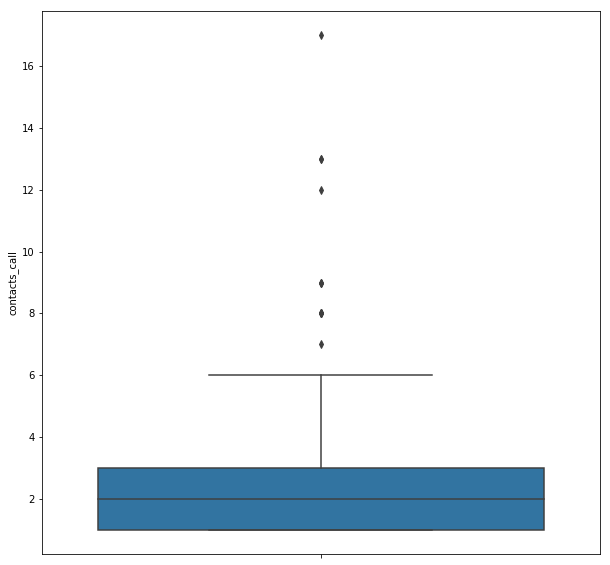

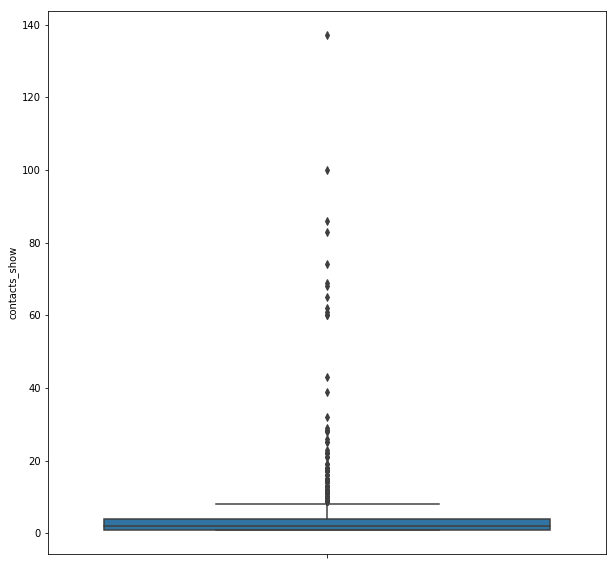

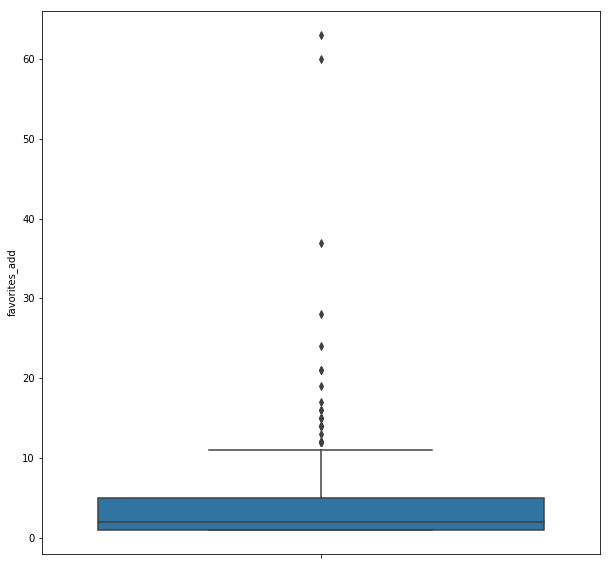

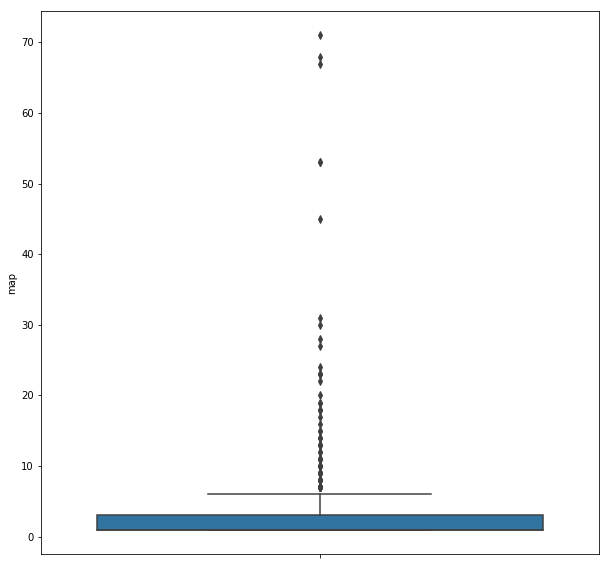

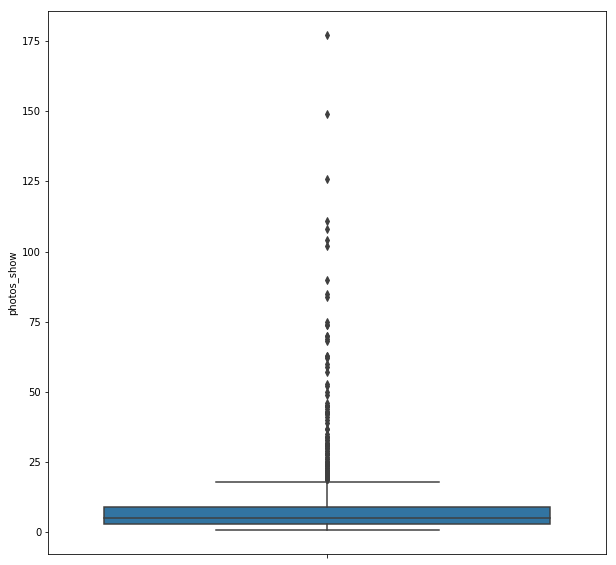

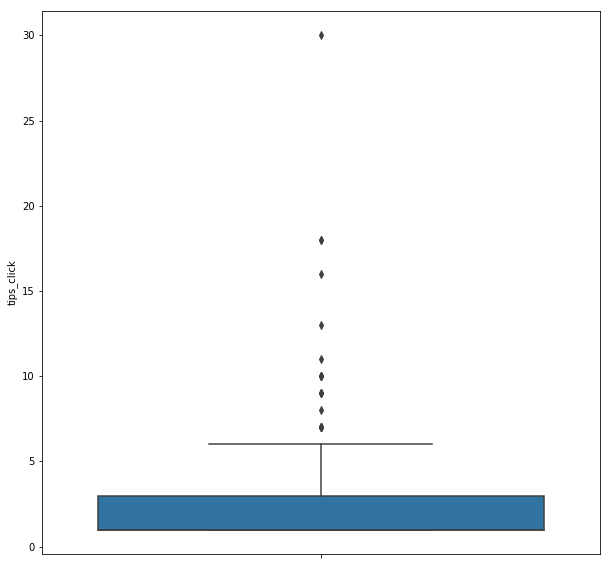

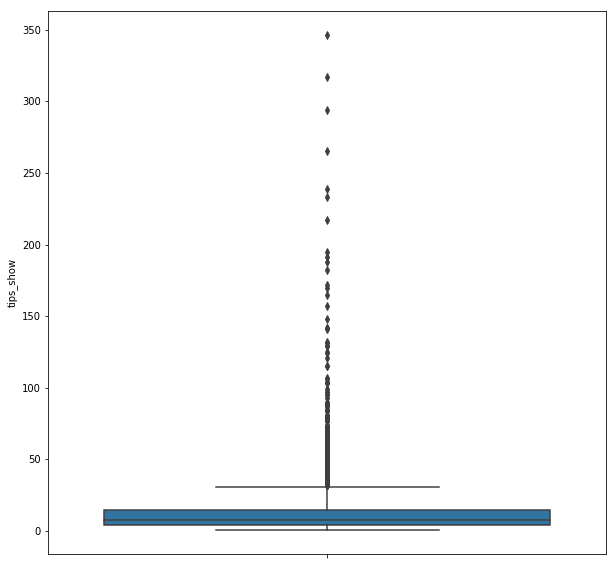

In [329]:
percentile_95 = []
for i in actions_by_users.columns[2:9]:
    plt.figure(figsize = (10,10))
    sns.boxplot(data = actions_by_users.replace(0,np.NaN), y = i)
    percentile_95.append(np.nanpercentile(actions_by_users[i].replace(0, np.NaN), 95))

filtered = actions_by_users
for i, z in zip(actions_by_users.columns[2:], percentile_95):
    filtered = filtered[filtered[i]<z]

In [330]:
filtered.corr()

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,tips_click,tips_show,search
event_name,,,,,,,,,
advert_open,1.000000,-0.021985,-0.016082,0.052071,0.185056,-0.068384,0.003164,0.173345,0.024515
contacts_call,-0.021985,1.000000,0.491120,0.067269,-0.098339,0.122475,-0.038003,-0.135473,0.049926
contacts_show,-0.016082,0.491120,1.000000,0.054247,-0.021497,0.044626,0.024206,0.011923,0.045916
favorites_add,0.052071,0.067269,0.054247,1.000000,-0.063929,0.153543,0.019433,-0.028186,0.064968
map,0.185056,-0.098339,-0.021497,-0.063929,1.000000,-0.223926,0.040867,0.323181,-0.034473
photos_show,-0.068384,0.122475,0.044626,0.153543,-0.223926,1.000000,-0.084371,-0.306744,0.114073
tips_click,0.003164,-0.038003,0.024206,0.019433,0.040867,-0.084371,1.000000,0.169267,-0.030712
tips_show,0.173345,-0.135473,0.011923,-0.028186,0.323181,-0.306744,0.169267,1.000000,-0.067825
search,0.024515,0.049926,0.045916,0.064968,-0.034473,0.114073,-0.030712,-0.067825,1.000000


Вероятно нормализация данных не является лучше идеей, ведь данные собьраны за разные промежутки времени и это тут нельзя просто так удалять часть данных, ведь некотоые пользователи могли дольше взаимождействовать с приложением.

### Оценим какие действия совершают те пользователи, которые просматривают контакты.  <a id="step3.4"></a>

In [331]:
print('Количество действий на одного пользователя по всей базе')
actions_by_users.mean().reset_index().sort_values(by = 0, ascending = False)

Количество действий на одного пользователя по всей базе


,event_name,0
7,tips_show,9.330305
5,photos_show,2.332169
8,search,1.580247
0,advert_open,1.435826
2,contacts_show,1.054973
4,map,0.904030
3,favorites_add,0.330072
6,tips_click,0.189611
1,contacts_call,0.126019


In [332]:
print('Количество действий на одного пользователя по клиентам которые открыли контакты')
act_goal = actions_by_users[actions_by_users['user_id'].isin(goal_users)].mean().reset_index().sort_values(by = 0, ascending = False)
act_goal.columns = ['Название события', 'Сколько в среднем раз его совершил клиент']
act_goal

Количество действий на одного пользователя по клиентам которые открыли контакты


,Название события,Сколько в среднем раз его совершил клиент
7,tips_show,13.015291
2,contacts_show,4.616718
5,photos_show,3.902141
8,search,2.124363
0,advert_open,1.619776
4,map,1.122324
1,contacts_call,0.551478
3,favorites_add,0.432212
6,tips_click,0.339450


In [333]:
print('Количество действий на одного пользователя по клиентам которые не открывали контакты')
act_not_goal= actions_by_users[actions_by_users['user_id'].isin(goal_users)==False].mean().reset_index().sort_values(by = 0, ascending = False)
act_not_goal.columns = ['Название события', 'Сколько в среднем раз его совершил клиент']
act_not_goal

Количество действий на одного пользователя по клиентам которые не открывали контакты


,Название события,Сколько в среднем раз его совершил клиент
7,tips_show,8.238829
5,photos_show,1.867150
8,search,1.419082
0,advert_open,1.381341
4,map,0.839372
3,favorites_add,0.299819
6,tips_click,0.145229
1,contacts_call,0.000000
2,contacts_show,0.000000


Таким образом, пользователи, которые октрывали контакты (как и ожидалось) совершают больше действий на одного пользоватейля нежели пользователи которые не просматривали контакты.  
Так целевым пользователям реклама была показана на 5 раз чаще нежели обычным пользователям. На эту рекламы целевые пользователи нажимали в 2 раза чаще нежели нецелвые пользователи.  
Целевые пользователи в 2 раза чаще просматривали фотографии товара нежелди нецелевые.  
Наиболее близкое значение было у действия advert_open - оно примеерно одинаково по группам.

Таким образом, если говорить только про целевых пользователоей, то очередность популярности действий выглядит хорошо для компании (если конечно считаь ключевым действие показ контактов): клиенту показали рекламу 13 раз - он посмотрел контакты продавца 4 раза, посмотрел фотографии 4 раза. И каждый второй ключевой пользователь позвонил продавцу товара.

Проверим гипотезу о том, что клиенты которые просматривают контакты активнее. Посчитаем метрики.

### Метрики

Рассчитаем DAU, WAU, Sticky factor

In [334]:
def metrics(df, text):
    DAU_all = int(df.groupby('day')['user_id'].nunique().mean())
    WAU_all = int(df.groupby('week')['user_id'].nunique().mean())
    sticky_all =DAU_all/WAU_all
    df['lifetime_w'] = df['week'] - df['first_week']
    cohorts = df.groupby(['first_week','lifetime_w']).agg({'user_id':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['lifetime_w'] == 0][['first_week','user_id']]
    initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})
    cohorts = cohorts.merge(initial_users_count,on='first_week')
    cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']
    retention_pivot = cohorts.pivot_table(index='first_week',columns='lifetime_w',values='retention',aggfunc='sum')
    retention = retention_pivot.mean().reset_index()
    retention.columns = ['lifetime_in_weeks', 'retention as % of week 0']
    print('DAU {}'.format(text), DAU_all)
    print('WAU {}'.format(text), WAU_all)
    print('Sticky factor {}'.format(text), sticky_all)
    sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
    display(retention)

DAU по всей базе пользователей: 279
WAU по всей базе пользователей: 1382
Sticky factor по всей базе пользователей: 0.20188133140376266


,lifetime_in_weeks,retention as % of week 0
0,0,1.000000
1,1,0.233675
2,2,0.141688
3,3,0.105310


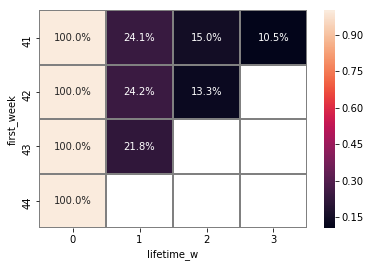

In [335]:
metrics(df, 'по всей базе пользователей:')

DAU по пользователям, которые просматривали контакты: 88
WAU по пользователям, которые просматривали контакты: 355
Sticky factor по пользователям, которые просматривали контакты: 0.24788732394366197


,lifetime_in_weeks,retention as % of week 0
0,0,1.000000
1,1,0.358787
2,2,0.208280
3,3,0.161765


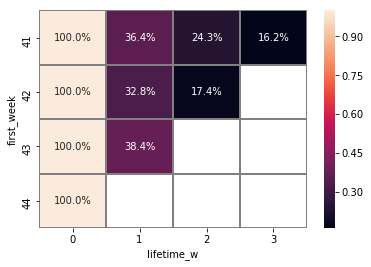

In [336]:
metrics(df[df['user_id'].isin(goal_users)], 'по пользователям, которые просматривали контакты:')

DAU по пользователям, которые НЕ просматривали контакты: 190
WAU по пользователям, которые НЕ просматривали контакты: 1027
Sticky factor по пользователям, которые НЕ просматривали контакты: 0.18500486854917234


,lifetime_in_weeks,retention as % of week 0
0,0,1.000000
1,1,0.194748
2,2,0.121395
3,3,0.087413


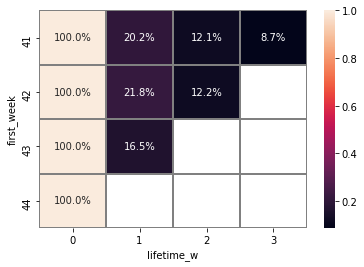

In [337]:
metrics(df[df['user_id'].isin(goal_users)==False], 'по пользователям, которые НЕ просматривали контакты:')

Как видим, после построения retention rate по когортам мы приходим к выводу, что кривая показателй среденго показателя по по клиентам просматривающим контакты будет выше чем по другим клиентам. Посмотрим:

Визуализируем.

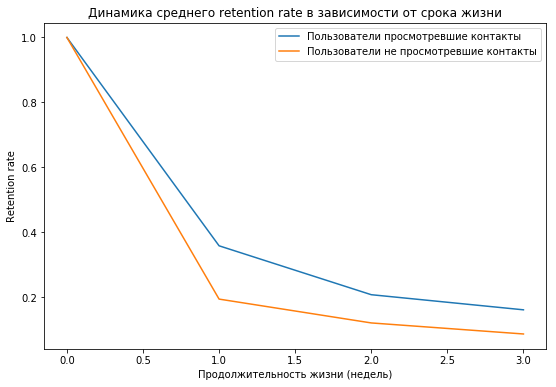

In [338]:
plt.figure(figsize=(9,6))
plt.plot(retention_goal['lifetime_in_weeks'],retention_goal['retention as % of week 0'], label = "Пользователи просмотревшие контакты")
plt.plot(retention_goal['lifetime_in_weeks'],retention_not_goal['retention as % of week 0'],label = "Пользователи не просмотревшие контакты")
plt.xlabel('Продолжительность жизни (недель)')
plt.ylabel('Retention rate')
plt.title("Динамика среднего retention rate в зависимости от срока жизни")
plt.legend()
plt.show()

Таким образом, метрики расчет метрик еще раз подтвердил гопотезу о том, что ползьователи просматривающие контакты более полезны для продукта: они совершают больше действий, имеют больший sticky factor(чаще возращаются) и имеют более высокий retention rate, что означает, что на них можено будет заработать больше денег, ведь им можно будет рекомендовать объявления на протяжении более долго срока жизни.

### Проверим статистические гипотезы. <a id="step4"></a>

In [339]:
def stat_check(successes, trials, alpha):
            # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

        # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    print()
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print("Проверяем гипотезу о равенстве долей клиентов совершивших этап:contacts_show")
    print('p-значение: ', p_value)
    print("Разница в конверсии: {:.2f}%".format(((p2/p1-1)*100)))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

#### 1 гипотеза.

In [340]:
tips_show_users = actions_by_users[actions_by_users['tips_show']>0]['user_id'].unique()
tips_click_users_and_show = actions_by_users[(actions_by_users['tips_click']>0)&\
                                             (actions_by_users['tips_show']>0)]['user_id'].unique()

successes = np.array([actions_by_users[(actions_by_users['user_id'].isin(tips_show_users))&\
                                       (actions_by_users['contacts_show']>0)]['user_id'].nunique(),
                      actions_by_users[(actions_by_users['user_id'].isin(tips_click_users_and_show))&\
                                       (actions_by_users['contacts_show']>0)]['user_id'].nunique()])

trials = np.array([actions_by_users[actions_by_users['tips_show']>0]['user_id'].nunique(),
                       actions_by_users[(actions_by_users['tips_click']>0)&\
                                        (actions_by_users['tips_show']>0)]['user_id'].nunique()])

In [341]:
stat_check(successes,trials, 0.05)


Проверяем гипотезу о равенстве долей клиентов совершивших этап:contacts_show
p-значение:  4.5562183781377996e-07
Разница в конверсии: 66.32%
Отвергаем нулевую гипотезу: между долями есть значимая разница


Таким образом, клиенты, которым показали рекламу и они на нее нажили на 60% вероятнее просмотрят контакты, нежели клиенты которым просто показали рекламу.

#### 2 гипотеза.

На этом этапе может показаться, что я копирую гипотезу номер 1, но это не так!))  
Выше в анализе данных, матрица корреляций показала, что на событие contacts_call показатели tips_show, tips_click и map имели наибольший эффект и хотелось бы проверить как показатель map влияет ан конверсию в метриках.

In [342]:
tips_show_users = actions_by_users[actions_by_users['tips_show']>0]['user_id'].unique()
map_users_and_show = actions_by_users[(actions_by_users['tips_show']>0)&(actions_by_users['map']>0)]['user_id'].unique()

successes_2 = np.array([actions_by_users[(actions_by_users['user_id'].isin(tips_show_users))&(actions_by_users['contacts_show']>0)]['user_id'].nunique(),
                          actions_by_users[(actions_by_users['user_id'].isin(map_users_and_show))&(actions_by_users['contacts_show']>0)]['user_id'].nunique()])

trials_2 = np.array([actions_by_users[actions_by_users['tips_show']>0]['user_id'].nunique(),
                       actions_by_users[(actions_by_users['tips_show']>0)&(actions_by_users['map']>0)]['user_id'].nunique()])

In [343]:
stat_check(successes_2,trials_2, 0.15)


Проверяем гипотезу о равенстве долей клиентов совершивших этап:contacts_show
p-значение:  0.14016623429844932
Разница в конверсии: 10.41%
Отвергаем нулевую гипотезу: между долями есть значимая разница


Конверсия в звонок у пользователей, которые после получали уведомления и смотрели карту на 10.5% выше чем у тех кто просто просматривал рекомендации. Однако тест показал, что данное различие яявлется незначимым, на уровнях значимости менее 15%. Видимо взаимосвязь данных показателей не явялется сильной и данные показатели не действия не так связаны, как показатели из гипотезы 1. Все же 15% на даннйо маленькой выборке с одинарынм тестом - неплохой показтель. Вероятно данную гипотезу стоит проверить на более большой базе пользователей с меньшим количеством выбросов.

#### 3 гипотеза (так сказать, дополнительная)

Мы поняли, что конверсия от совместного выполнения действий tips_show и tips_click значительно (статисчитически) выше нежиели просто tips_show. Хотелось бы проверить будет ли конверсия от совместного выполнения tips_show, tips_click и map еще выше, чем от tips_show и tips_click.

In [344]:
tips_click_users_and_show = actions_by_users[(actions_by_users['tips_click']>0)&\
                                             (actions_by_users['tips_show']>0)]['user_id'].unique()
tips_click_users_and_show_and_map = actions_by_users[(actions_by_users['tips_click']>0)&\
                                            (actions_by_users['tips_show']>0)&(actions_by_users['map']>0)]['user_id'].unique()

successes_3 = np.array([actions_by_users[(actions_by_users['user_id'].isin(tips_click_users_and_show))&\
                                       (actions_by_users['contacts_show']>0)]['user_id'].nunique(),
                          actions_by_users[(actions_by_users['user_id'].isin(tips_click_users_and_show_and_map))&\
                                           (actions_by_users['contacts_show']>0)]['user_id'].nunique()])

trials_3 = np.array([actions_by_users[(actions_by_users['tips_click']>0)&\
                                    (actions_by_users['tips_show']>0)]['user_id'].nunique(),
                       actions_by_users[(actions_by_users['tips_click']>0)&\
                                        (actions_by_users['tips_show']>0)&(actions_by_users['map']>0)]['user_id'].nunique()])

In [345]:
stat_check(successes_2,trials_2, 0.05)


Проверяем гипотезу о равенстве долей клиентов совершивших этап:contacts_show
p-значение:  0.14016623429844932
Разница в конверсии: 10.41%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Таким образом, данная гипотеза не подтвердилась статистически - слишком высоких p-value.

### Выводы и рекомендации. <a id="step5"></a>

#### Выводы: 
В ходе исследования были проанализирвоны действия новых клиентов за период. Ключевой метрикой выступило дейсndbt просмотра контактов (contact_show). Анализ был сфокусирован на поведении клиентов. Для этого были рассмотрена взаимосвязь событий клиентов с ключевым событием и построены их корреляции. Также были рассмотрены действия клиентов в зависомости от того, совершал клиент ключевое действие или нет. Затем на основе данного анализа были проверены гипотезы, направленные на улучшение понимаения действий клиентов. В ходе исследжования были выделены следующие инсайты:

#### Инсайты:
1. Наибольшее влияние на просмотр контактов клиентов оказывают действия tips_show, tips_click и map. Остальные действия на данный момент можно отнести просто к активности клиентов в приложении. Ключевыми являются дейсвтяи tips_show, tips_click и map.
2. На этапа рассмотерения корреляций была выявлена проблема с конверсией в contacts_call - лишь 1 из 2826 уникальных клиентов которым показывали рекламу или который на нее нажимал позвонил по контактам, в то время как из 1467 клиентов которые не видели рекламу 212 позвонили по конактам. Была сделана гипотеза о том, что присутствует проблема в выгрузке данных.
3. Распределения клиентов которые совершали ключевое действие несильно отличаются по форме (только по величине) от тех, кто его не совершал, что говорит о том, что поведение клиентов примерно одинаково. Исключением является показ рекламы (contacts_show) - клиенты которые совершали ключевое действие значительно дольше находятся в приложении и из-за этого у им показывается большее количество рекламы.
4. Анализ действий клиентов показал, что в целом пользователи, которые просматривали контакты  совершают значительно больше едйствий неджели клиенты которые не просматривали контакты, что позволило сделать гипотезу о больше вовлеченности таких клиентов в приложение. Так ключевая, с точки зрения нашей прибыли, среднее количество показов contacts_show у ключевой группы на 60% выше нежели у неключевой.
5. Анализ актвиности клиентов по группам показал, что ключевые клиенты имеют на 34% больший sticky factor нежели неключевые клиента. Также имеют примерно в 2 раза выше retention rate - и вероятнее остануться с приложением примерно в два раза дольше в долгосрочной перспективе. Таким образом совокупность этих метрик позволяет говорить о том, клиенты котоыре дошли до просмотра будут с нами значительно дольше и (чаще) недели неключевые клиенты.
6. Было выявлено, что клиенты которые просмотрели и нажил на контакты на 60% большую конверсию в этап просмотра контакта, нежили те, кому просто показали рекламу, что говорит о том, что если клиенту понравится наша рекомендация он вероятнее просмотрит контакты.
7. Также подтвердилась гипотеза, что просмотр карты и рекламы повышает конверси в просмтро контаков на 10%, что говорит о том, что еще раз подвтерждает идею о необходимости полезности карты для клиентов и соотвественно косвенно для нас.
8. Первым действие 15% клиентов стал просмотр контактов.

#### Рекомендации:

Обобщение полученных инсайтов позволяет сформулирвоать идею о том, что клиенты, которые совершают ключевое действие большее время проводят в приложении и используют его более активно. Однако, также важным замечанием может стать тот факт, что если приложение не имеет полезности для клиента - долго пользоватеься он им не будет. Таким образом:

1. Необходимо в первую очередь улучшать рекомендательную систему. Предлагать клиента более нужные им вещи, тогда они с большей вреотяностью будут просматривать контакты, и находить для себя вещи лучше и нужнее, тогда они будут находить приложение полезным, что позволит показывать им больше рекомендательных объявлений в лонгране. Также, как показал статисчтический тест, пользователи, которым понравились рекомендации и они на них нажали на 60% вероятнее конвертируются в просмотр контактов.
2. Необходимо отслеживать клиентов, которые не просматривали контакты вообще за определенный период времени, после начала пользования приложением и предлагать им дполонительные фичи, которые приведут к их первому просмотру контактов - что сделает вроятность их удерадния в приложении выше.
3. Также необходимо поощрять клиентов которые уже октрыли контакты и напоминать им если они по нима не звонили - например пуш уведомлениями. 
4. Необходимо проверить работу механизма отслеживания звонка по контактам - в нем веротяно что-то сломался. Если же все работает корректно, то нужно координально перерабатывать рекомендательную систему ведь, клиенты которым мы показываем рекламу вообще не звонят по контактам. Полезность клиента от нашего приложения вероятно зависистт от покупок товаров, и если клиент просто смотрит контакты, то это может создать ложное представление о полезности у клиента и он осознав это уйдет из приложения - за период дольше рассматриваемого. Таким образом, необходимо проверить конверсию в звонки.
5. Принять решение относительно необходимости события просмотра контаков. Нужно посоветоваться с техническо поддержкой и понять возможно ли вообще остлеживать звонки клиента по номеру (и есть ли ошибка в данных). И только после этого принимать решение. В частности, если есть техническая возможность четко ослеживать звонки, то провести A/B тест и сравнить конверсии клиентов в звонки при и без наличия шага с просмотром контактов. Также паралллельно сравнить обращзения в поддрежку или жалобы и если показтели не отличаются на опредленные величины (заданные экспретно или анлитически) то не вводить именения. После текущего анализа принимать решение о целесообразности исключения действия просмотра контактов – не показательно.